# Descarga de los Datos

In [1]:
import os
import json
import gzip
import pandas as pd
from urllib.request import urlopen

In [2]:
# Descargamos en drive y descomprimimos (podéis señalar la ruta )
from google.colab import drive

# Monta tu Google Drive en Colab
drive.mount('/content/drive')

ruta_destino_descarga = "/content/drive/MyDrive/Digital_Music.json.gz"
ruta_destino_descomprimido = "/content/drive/MyDrive/Digital_Music.json"

Mounted at /content/drive


In [ ]:
# Descargar el archvivo desde el repositorio

# URL del dataset
url_del_dataset = 'https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/categoryFiles/Digital_Music.json.gz'

# Descargamos el dataset elegido y guardamos el archivo en la ruta de destino especificada en Colab
!wget --no-check-certificate -O "{ruta_destino_descarga}" "{url_del_dataset}"

# Verificamos que el archivo se haya descargado correctamente
!ls -l "{ruta_destino_descarga}"

# Descomprimo el archivo guardando el resultado en la ruta especificada de Drive
!gunzip -c "{ruta_destino_descarga}" > "{ruta_destino_descomprimido}"

# Verifico que el archivo se haya descargado correctamente
!ls -l "{ruta_destino_descomprimido}"

In [3]:
# cargamos el dataset en un dataframe

## Creo un dataset balanceado de x reseñas positivas y x negativas

import pandas as pd

# Inicializamos listas para almacenar registros positivos y negativos
registros_positivos = []
registros_negativos = []

# Especifico la ruta del archivo descomprimido
ruta_destino_descomprimido = "/content/drive/MyDrive/Digital_Music.json"

# Máximo número de registros por categoría
max_registros = 10000
# Seleccioné inicialmente 10,000 reseñas positivas y 10,000 negativas debido a limitaciones de recursos.
# En el futuro, con mejores recursos, me gustaría trabajar con más registros para mejorar la precisión del modelo de aprendizaje. Es esencial equilibrar la cantidad de datos y los recursos disponibles.

with open(ruta_destino_descomprimido, 'r') as archivo:
    # Continúa leyendo mientras no se haya alcanzado el máximo en alguna de las listas
    while len(registros_positivos) < max_registros or len(registros_negativos) < max_registros:
        linea = archivo.readline()
        # Si se alcanza el final del archivo, detener el bucle
        if not linea:
            break
        registro = pd.read_json(linea, typ='series')
        overall = registro['overall']
        # Clasifica el registro como positivo o negativo
        if overall >= 4 and len(registros_positivos) < max_registros:
            registros_positivos.append(registro)
        elif overall <= 3 and len(registros_negativos) < max_registros:
            registros_negativos.append(registro)

# Combina las listas en un DataFrame
df_positivos = pd.DataFrame(registros_positivos)
df_negativos = pd.DataFrame(registros_negativos)

# Concatenar las muestras para formar el DataFrame final
df = pd.concat([df_positivos, df_negativos]).reset_index(drop=True)

Se han truncado las últimas 5000 líneas del flujo de salida.
<ipython-input-3-6cef1d4f8b41>:24: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  registro = pd.read_json(linea, typ='series')
<ipython-input-3-6cef1d4f8b41>:24: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  registro = pd.read_json(linea, typ='series')
<ipython-input-3-6cef1d4f8b41>:24: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed a

In [4]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,True,"12 22, 2013",A1ZCPG3D3HGRSS,0001388703,{'Format:': ' Audio CD'},mark l. massey,This is a great cd full of worship favorites!!...,Great worship cd,1387670400,NaN,NaN
1,5.0,True,"09 11, 2013",AC2PL52NKPL29,0001388703,{'Format:': ' Audio CD'},Norma Mushen,"So creative! Love his music - the words, the ...",Gotta listen to this!,1378857600,NaN,NaN
2,5.0,True,"03 2, 2013",A1SUZXBDZSDQ3A,0001388703,{'Format:': ' Audio CD'},Herbert W. Shurley,"Keith Green, gone far to early in his carreer,...",Great approach still gets the message out,1362182400,NaN,NaN
3,5.0,True,"12 2, 2012",A3A0W7FZXM0IZW,0001388703,{'Format:': ' Audio CD'},Mary M Raybell,Keith Green had his special comedy style of Ch...,Great A must have,1354406400,NaN,NaN
4,5.0,False,"01 7, 2012",A12R54MKO17TW0,0001388703,{'Format:': ' Audio CD'},J. Bynum,Keith Green / So you wanna go back to Egypt......,A great one from Keith with a guest appearance...,1325894400,6,NaN


In [4]:
# Inicializamos listas para almacenar el texto de la reseña y la puntuación
reviews_text = []
reviews_sentiment = []

# Iteramos sobre cada fila del DataFrame
for index, row in df.iterrows():
    # Obtenemos el texto de la reseña y la puntuación
    review_text = row['reviewText']
    sentiment = row['overall']

    # Agregamos el texto de la reseña y la puntuación a las listas correspondientes
    reviews_text.append(review_text)
    reviews_sentiment.append(sentiment)

# Creamos un nuevo DataFrame con las listas creadas
data = pd.DataFrame({
    'review': reviews_text,
    'sentiment': reviews_sentiment
})

# Eliminamos filas con valores nulos en las columnas 'review' y 'sentiment'
data.dropna(subset=['review', 'sentiment'], inplace=True)

# Restablecemos los índices del DataFrame
data.reset_index(drop=True, inplace=True)

# Mostramos la cabecera del DataFrame procesado
print(data.head())


                                              review  sentiment
0  This is a great cd full of worship favorites!!...        5.0
1  So creative!  Love his music - the words, the ...        5.0
2  Keith Green, gone far to early in his carreer,...        5.0
3  Keith Green had his special comedy style of Ch...        5.0
4  Keith Green / So you wanna go back to Egypt......        5.0


In [5]:
# He asumido que menores que 4 tiene la etiqueta 0, que son las negativas, y el 4 y el 5 tienen la 1, que son las positivas.

def label_sentiment(row):
    if int(row['sentiment']) < 4:
        return 0
    else:
        return 1

In [6]:
data['sentiment_label'] = data.apply(lambda row: label_sentiment(row), axis=1)

In [7]:
data.head()

,review,sentiment,sentiment_label
0,This is a great cd full of worship favorites!!...,5.0,1
1,"So creative! Love his music - the words, the ...",5.0,1
2,"Keith Green, gone far to early in his carreer,...",5.0,1
3,Keith Green had his special comedy style of Ch...,5.0,1
4,Keith Green / So you wanna go back to Egypt......,5.0,1


# Exploración de los Datos

In [16]:
!pip install nltk

In [19]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [29]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Tokenización de las reseñas para calcular la cardinalidad del vocabulario
def tokenize_reviews(reviews):
    tokens = word_tokenize(reviews.lower())  # Convertir a minúsculas y tokenizar
    return tokens

# Función para generar nubes de palabras
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [30]:
# Cardinalidad del vocabulario
reviews_text = ' '.join(data['review'])  # Concatenar todas las reseñas en un solo texto
tokens = tokenize_reviews(reviews_text)
vocab_size = len(set(tokens))
print("Cardinalidad del vocabulario:", vocab_size)

Cardinalidad del vocabulario: 38952


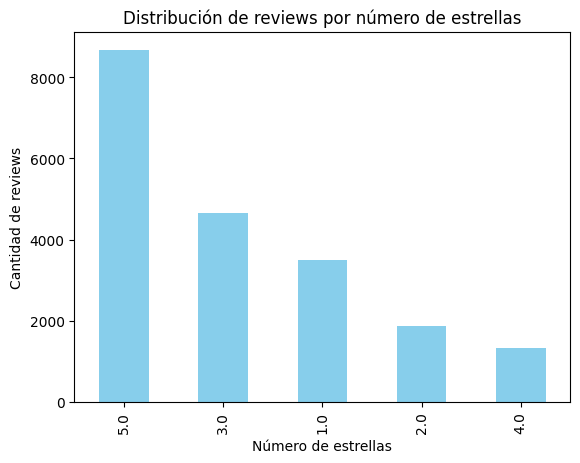

In [31]:
# Distribución de reviews por número de estrellas
star_distribution = data['sentiment'].value_counts()
star_distribution.plot(kind='bar', color='skyblue')
plt.title("Distribución de reviews por número de estrellas")
plt.xlabel("Sentiment")
plt.ylabel("Cantidad de reviews")
plt.show()

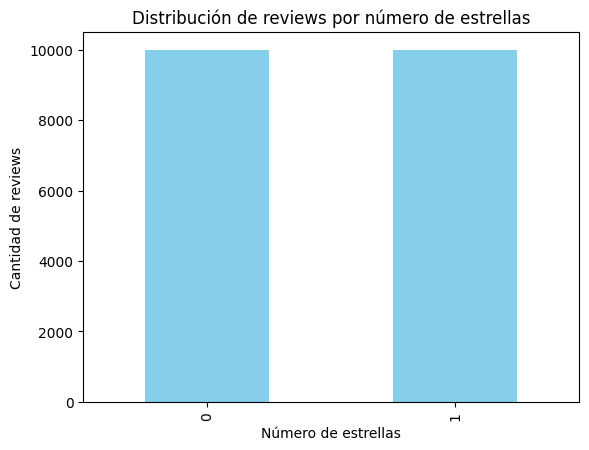

In [32]:
# Distribución de reviews por sentiment_label
star_distribution = data['sentiment_label'].value_counts()
star_distribution.plot(kind='bar', color='skyblue')
plt.title("Distribución de reviews por número de estrellas")
plt.xlabel("Número de estrellas")
plt.ylabel("Cantidad de reviews")
plt.show()

In [33]:
# Nº de reviews positivas y negativas
positive_reviews = data[data['sentiment'] >= 4]
negative_reviews = data[data['sentiment'] <= 3]
print("Número de reviews positivas:", len(positive_reviews))
print("Número de reviews negativas:", len(negative_reviews))

Número de reviews positivas: 9997
Número de reviews negativas: 10000


In [36]:
# N-grams más frecuentes
ngrams = nltk.ngrams(tokens, 2)
fdist = FreqDist(ngrams)
print("N-gramas más frecuentes:", fdist.most_common(10))

N-gramas más frecuentes: [(('.', 'i'), 12160), (('of', 'the'), 8341), ((',', 'and'), 6599), (('.', 'the'), 6213), ((',', 'but'), 5836), (('.', 'it'), 4544), (('it', "'s"), 4538), (('.', 'this'), 4419), (('this', 'is'), 4253), (('in', 'the'), 4210)]


In [35]:
# N-grams más frecuentes
ngrams = nltk.ngrams(tokens, 3)
fdist = FreqDist(ngrams)
print("N-gramas más frecuentes:", fdist.most_common(10))

N-gramas más frecuentes: [(('!', '!', '!'), 2079), (('.', 'this', 'is'), 1686), (('.', 'it', "'s"), 1453), (('one', 'of', 'the'), 1379), (('.', 'if', 'you'), 1342), (('i', 'do', "n't"), 1169), (('this', 'is', 'a'), 1049), (('.', 'it', 'is'), 954), ((',', 'but', 'i'), 810), (('this', 'album', 'is'), 774)]


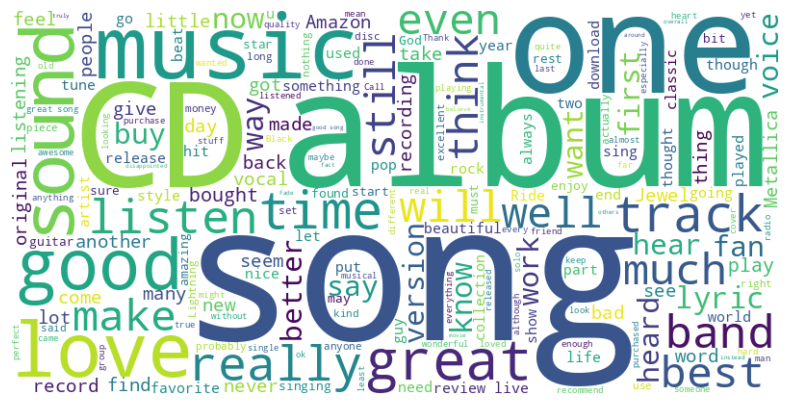

In [37]:
# Nubes de palabras
generate_wordcloud(reviews_text)

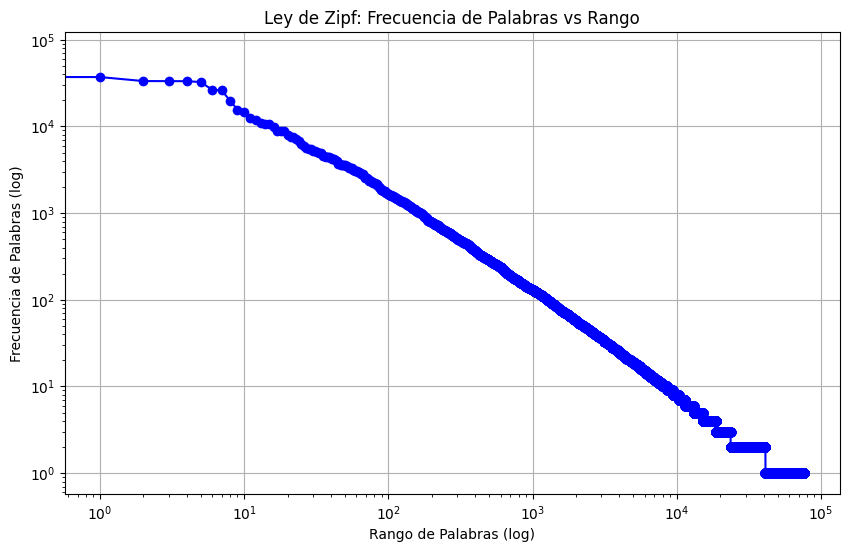

In [38]:
import pandas as pd
import matplotlib.pyplot as plt


# Tokenización de las reseñas
reviews_text = ' '.join(data['review'])
tokens = reviews_text.lower().split()

# Cálculo de la frecuencia de palabras
word_freq = pd.Series(tokens).value_counts()

# Ordenar el Series por frecuencia de palabras
word_freq_sorted = word_freq.sort_values(ascending=False)

# Graficar la Ley de Zipf
plt.figure(figsize=(10, 6))
plt.plot(word_freq_sorted.values, marker='o', linestyle='-', color='b')
plt.xscale('log')
plt.yscale('log')
plt.title('Ley de Zipf: Frecuencia de Palabras vs Rango')
plt.xlabel('Rango de Palabras (log)')
plt.ylabel('Frecuencia de Palabras (log)')
plt.grid(True)
plt.show()


En est proyecto, he realizado una serie de análisis para entender mejor los datos con los que estoy trabajando:

Cardinalidad del vocabulario: Calculé la cardinalidad del vocabulario, que es el número total de palabras únicas en el conjunto de datos. Esto me ayudó a entender la diversidad del lenguaje en las reseñas.

Visualización de bi-grams y tri-grams: Visualicé los bi-grams y tri-grams más comunes. Los bi-grams son pares de palabras consecutivas, y los tri-grams son grupos de tres palabras consecutivas. Esto me dio una idea de las frases que se usan con frecuencia en las reseñas.

Número de reseñas positivas y negativas: Conté el número de reseñas positivas y negativas. Esto fue importante para asegurarme de que el conjunto de datos estuviera balanceado, lo cual es crucial para muchos modelos de aprendizaje automático.

Nubes de palabras: Creé nubes de palabras, que son una forma visual de representar las palabras más comunes en un conjunto de datos. Las palabras que aparecen con más frecuencia se muestran en un tamaño de fuente más grande. Esto me ayudó a entender rápidamente los temas más comunes en las reseñas.
Ley de Zipf: Finalmente, comprobé si mis datos siguen la Ley de Zipf. Esta ley establece que la frecuencia de una palabra es inversamente proporcional a su rango en la lista de frecuencias. Si mis datos siguen esta ley, indica que tienen una distribución de palabras similar a la del lenguaje natural.ç

Estos análisis me han proporcionado una comprensión profunda de mis datos y me han ayudado a prepararme para los siguientes pasos del proyecto.

# Preprocesamiento

In [8]:
import nltk

In [9]:
# Es necesario descargar previamente el corpora de WordNet para la Lemmatization
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [10]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [11]:
# Para las stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
!pip install num2words

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=31f7480df20a4d01be3a350016d68a06fb7c6d89a1c9dec4d6f42dfc2f6d8c6f
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [13]:
import unicodedata
from num2words import num2words
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import RegexpTokenizer

def pipeline_preprocessing(text, tokenizer, sw_list, lemmatizer):
    clean_reviews = []

    # Elimina los acentos y los caracteres especiales del texto, dejando solo los caracteres ASCII básicos
    text = text.apply(lambda x: unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore'))

    # Separar palabras eliminando signos de puntuación
    for txt in text:
        clean_text = []
        for word in tokenizer.tokenize(txt):

            # Eliminar stop words
            if word not in sw_list:

                # Eliminar espacios sobrantes, convertir a minúsculas y lematizar
                clean_word = lemmatizer.lemmatize(word).lower().strip()

                # Convertir dígitos a palabras
                if clean_word.isdigit():
                    clean_word = num2words(clean_word, lang='en')

                clean_text.append(clean_word)

        clean_reviews.append(clean_text)

    return clean_reviews



In [14]:
tokenizer = RegexpTokenizer(r'\w+')
sw_list = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

In [15]:
processed_reviews = pipeline_preprocessing(data['review'], tokenizer, sw_list, lemmatizer)

In [16]:
print('Review original: {}'.format(data['review'].values[0]))
print('Review procesada: {}'.format(' '.join(processed_reviews[0])))

Review original: This is a great cd full of worship favorites!!  All time great Keith green songs. His best album by far.
Review procesada: this great cd full worship favorite all time great keith green song his best album far


In [17]:
# Convertir las listas de palabras en strings
processed_reviews = [' '.join(review) for review in processed_reviews]

In [18]:
# Crear una nueva columna en el DataFrame con las reviews procesadas
data['processed_review'] = processed_reviews

In [19]:
# Eliminar la columna original de las reviews
data = data.drop(columns=['review'])

In [20]:
data.head()

,sentiment,sentiment_label,processed_review
0,5.0,1,this great cd full worship favorite all time g...
1,5.0,1,so creative love music word message some favor...
2,5.0,1,keith green gone far early carreer left u gold...
3,5.0,1,keith green special comedy style chirstian mus...
4,5.0,1,keith green so wanna go back egypt in album ke...


ERealicé un preprocesamiento de los datos utilizando la librería NLTK. Este preprocesamiento es esencial para preparar los datos para el modelado posterior. Creé un Pipeline que incluye los siguientes pasos:

Eliminación de acentos y caracteres especiales: Primero, eliminé los acentos y los caracteres especiales del texto, dejando solo los caracteres ASCII básicos. Esto simplifica el texto y reduce la cantidad de ruido en los datos.

Separación de palabras(tokenizacion): separé las palabras eliminando los signos de puntuación. Esto asegura que cada palabra se trate como una entidad separada.

Eliminación de stop words: eliminé estas palabras para reducir la dimensionalidad de los datos y centrarme en las palabras que son más relevantes para el análisis.

Lematización y conversión a minúsculas: Convertí todas las palabras a minúsculas para asegurarme de que palabras como “Libro” y “libro” se traten como la misma palabra. Además, lematicé las palabras, lo que significa que convertí las palabras a su forma base o raíz. Esto ayuda a reducir la dimensionalidad de los datos y a agrupar palabras similares.

Conversión de dígitos a palabras: Finalmente, convertí los dígitos a palabras. Esto es útil porque a menudo los números se usan de manera inconsistente en el texto y pueden ser difíciles de interpretar para un modelo de aprendizaje automático.

Estos pasos de preprocesamiento me ayudaron a preparar mis datos para el modelado posterior y a asegurarme de que los datos estén en un formato que pueda ser fácilmente interpretado por los modelos de aprendizaje automático.

# Modelado

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    data['processed_review'],
    data['sentiment_label'],
    train_size=0.75,
    test_size=0.25,
    random_state=42,
    shuffle=True
)

### Extracción de Características

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

cv = TfidfVectorizer(
    max_df=0.95,
    min_df=2,
    max_features=2500,
    strip_accents='ascii',
    ngram_range=(1, 2)
)
cv.fit(X_train)

TfidfVectorizer(max_df=0.95, max_features=2500, min_df=2, ngram_range=(1, 2),
                strip_accents='ascii')

In [24]:
print(list(cv.vocabulary_.items())[:20])

[('find', 765), ('cut', 482), ('good', 890), ('stuff', 2074), ('make', 1311), ('song', 1966), ('special', 2025), ('would', 2464), ('recommend', 1758), ('would recommend', 2469), ('this', 2191), ('album', 33), ('title', 2237), ('it', 1112), ('thing', 2181), ('missing', 1391), ('music', 1426), ('always', 71), ('dark', 494), ('somewhat', 1963)]


### TF-IDF scores

In [25]:
X_train_ = cv.transform(X_train)
X_test_ = cv.transform(X_test)

In [33]:
import random

i = random.randint(0, len(X_train))
print('ID: {}'.format(i))
print('Sentiment: {}'.format(y_train.iloc[i]))
print('Review: {}'.format(X_train.iloc[i]))

ID: 4344
Sentiment: 0
Review: i always loved song long version reciting lord prayer bad rhyme people say i rude i wish nude bad like think anything else say came two lame idea without lord prayer people say i rude bit nonsense great song


In [34]:
doc_vector = X_train_[i]
df_tfidf = pd.DataFrame(doc_vector.T.todense(), index=cv.get_feature_names_out(), columns=['tfidf'])
df_tfidf = df_tfidf[df_tfidf['tfidf'] > 0]

top_n = 10
print('Top {} words with highest TF_IDF in the review {}:\n{}'.format(top_n, i, df_tfidf.sort_values(by=["tfidf"],ascending=False)[:top_n]))
print('\nTop {} words with lowest TF_IDF in the review {}:\n{}'.format(top_n, i, df_tfidf.sort_values(by=["tfidf"],ascending=False)[-top_n:]))

Top 10 words with highest TF_IDF in the review 4344:
                  tfidf
prayer         0.423040
lord           0.351570
say            0.336370
people         0.250955
bad            0.246729
anything else  0.214970
loved song     0.212855
lame           0.211520
rhyme          0.207251
idea           0.163490

Top 10 words with lowest TF_IDF in the review 4344:
            tfidf
bit      0.136977
without  0.136258
long     0.127970
always   0.126897
song     0.116033
version  0.113213
think    0.110938
two      0.097836
great    0.082381
like     0.076360


In [ ]:
# Esto puede ser útil para entender qué palabras son consideradas “importantes” en una reseña específica, según la medida TF-IDF. Las palabras con un alto valor TF-IDF
# son las que aparecen frecuentemente en la reseña, pero raramente en el resto del corpus. Por otro lado, las palabras con un bajo valor TF-IDF son las que aparecen con poca
# frecuencia en la reseña y/o aparecen con frecuencia en el resto del corpus. Esto puede ayudar a entender el contenido y el contexto de la reseña.

### $\chi²$ scores




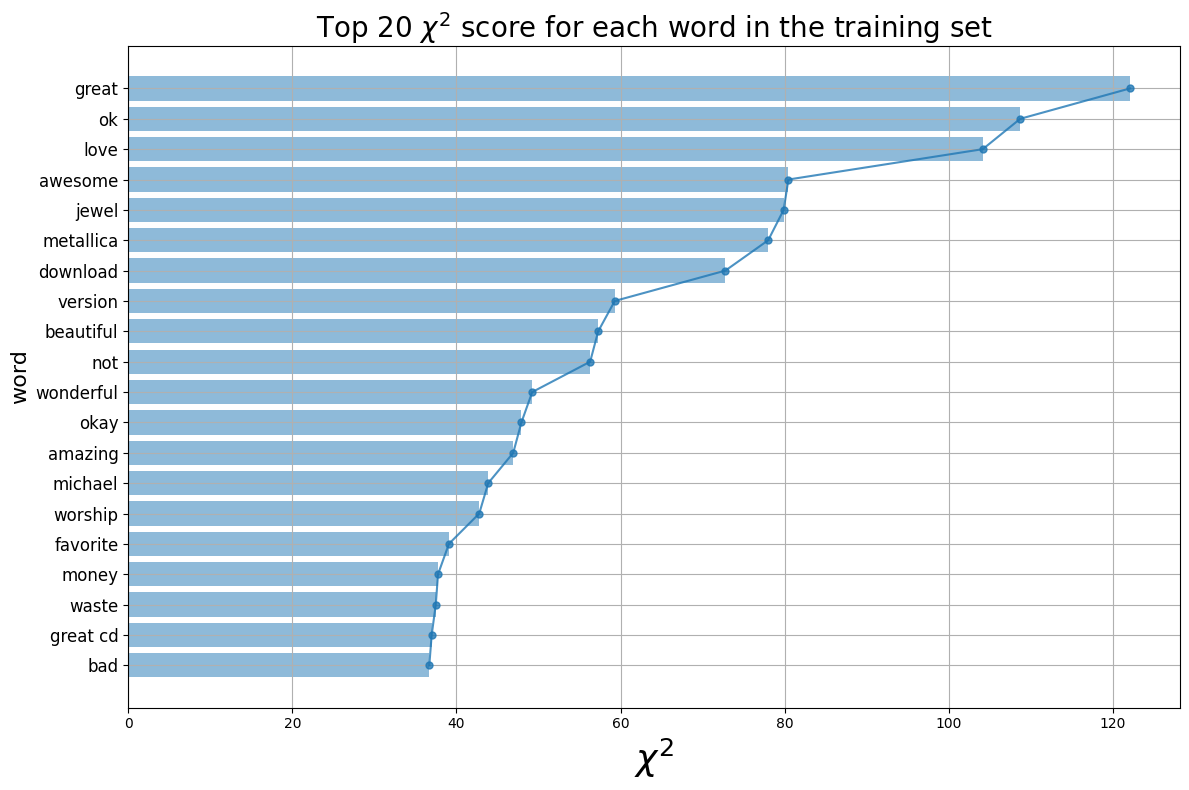

In [38]:
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt

i = 20

chi2score = chi2(X_train_, y_train)[0]
scores = list(zip(cv.get_feature_names_out(), chi2score))
sorted_scores = sorted(scores, key=lambda x:x[1])
topchi2 = list(zip(*sorted_scores[-i:]))
x = range(len(topchi2[1]))
labels = topchi2[0]

plt.figure(figsize=(12, 8))
plt.barh(x,topchi2[1], align='center', alpha=0.5)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels, fontsize=12)
plt.xlabel('$\chi^2$', fontsize=26)
plt.ylabel('word', fontsize=16)
plt.title('Top {} $\chi^2$ score for each word in the training set'.format(i), fontsize=20)
plt.grid()
plt.tight_layout()
plt.show();

### Entrenamiento con Modelo de Regresión Logística

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve

In [41]:
c_params = [0.01, 0.05, 0.25, 0.5, 1, 10, 100]

train_acc = list()
test_acc = list()
for c in c_params:
    lr = LogisticRegression(C=c, solver='lbfgs', max_iter=500)
    lr.fit(X_train_, y_train)

    train_predict = lr.predict(X_train_)
    test_predict = lr.predict(X_test_)

    print ("Accuracy for C={}: {}".format(c, accuracy_score(y_test, test_predict)))

    train_acc.append(accuracy_score(y_train, train_predict))
    test_acc.append(accuracy_score(y_test, test_predict))

Accuracy for C=0.01: 0.7994
Accuracy for C=0.05: 0.816
Accuracy for C=0.25: 0.8344
Accuracy for C=0.5: 0.8416
Accuracy for C=1: 0.847
Accuracy for C=10: 0.8458
Accuracy for C=100: 0.8344


### Métricas

In [42]:
print('\nClassification report:\n{}'.format(classification_report(y_test, test_predict)))
print('Accuracy score:{}'.format(accuracy_score(y_test, test_predict)))


Classification report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      2515
           1       0.84      0.83      0.83      2485

    accuracy                           0.83      5000
   macro avg       0.83      0.83      0.83      5000
weighted avg       0.83      0.83      0.83      5000

Accuracy score:0.8344


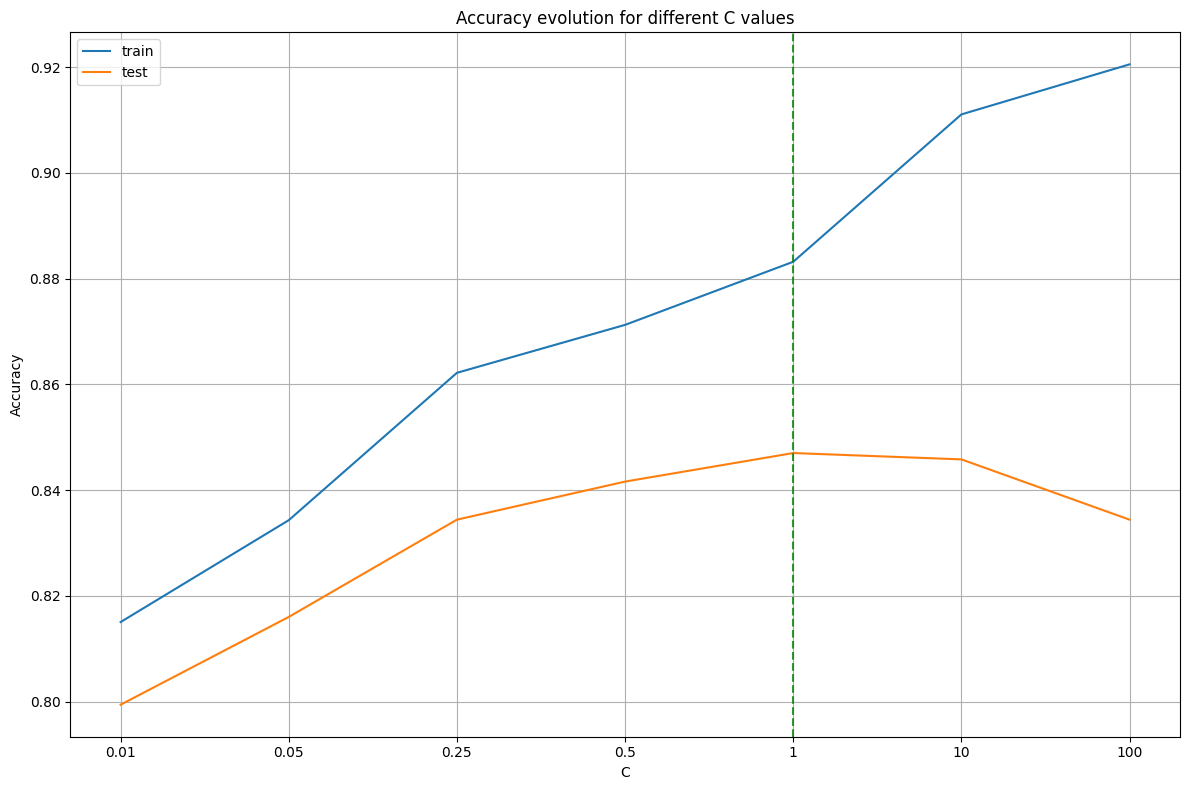

In [46]:
import numpy as np

plt.figure(figsize=(12, 8))
plt.plot(train_acc, label='train')
plt.plot(test_acc, label='test')
plt.axvline(np.argmax(test_acc), c='g', ls='--', alpha=0.8)
plt.title('Accuracy evolution for different C values')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.xticks(list(range(len(c_params))), c_params)
plt.tight_layout()
plt.show()

In [47]:
p, r, thresholds = precision_recall_curve(y_test, test_predict)

In [48]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

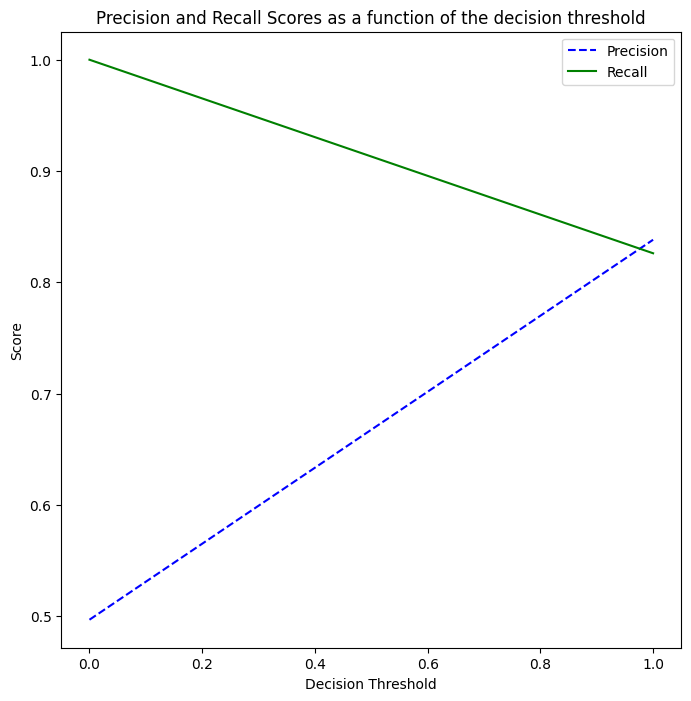

In [49]:
plot_precision_recall_vs_threshold(p, r, thresholds)

### Predicciones

In [57]:
def predict_review_sentiment(review_index, model):
    print('Actual sentiment: {}'.format(data.iloc[review_index]['sentiment_label']))
    r = data.iloc[review_index]['processed_review']
    print('Prediction: {}'.format(lr.predict(cv.transform([r]))))

In [58]:
for i in random.sample(range(0, len(data)), 7):
    print('\nReview no. {}'.format(i))
    predict_review_sentiment(i, lr)


Review no. 4050
Actual sentiment: 1
Prediction: [1]

Review no. 10356
Actual sentiment: 0
Prediction: [0]

Review no. 13576
Actual sentiment: 0
Prediction: [0]

Review no. 4687
Actual sentiment: 1
Prediction: [1]

Review no. 4871
Actual sentiment: 1
Prediction: [1]

Review no. 3667
Actual sentiment: 1
Prediction: [1]

Review no. 16334
Actual sentiment: 0
Prediction: [0]


### Entrenamiento con Modelo XGBoost

In [60]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Parámetros para XGBoost
xgb_params = [(max_depth, n_estimators) for max_depth in [3, 5, 7] for n_estimators in [100, 200, 300]]

train_acc = list()
test_acc = list()

for max_depth, n_estimators in xgb_params:
    model = xgb.XGBClassifier(max_depth=max_depth, n_estimators=n_estimators)
    model.fit(X_train_, y_train)

    train_predict = model.predict(X_train_)
    test_predict = model.predict(X_test_)

    print ("Accuracy for max_depth={}, n_estimators={}: {}".format(max_depth, n_estimators, accuracy_score(y_test, test_predict)))

    train_acc.append(accuracy_score(y_train, train_predict))
    test_acc.append(accuracy_score(y_test, test_predict))


Accuracy for max_depth=3, n_estimators=100: 0.809
Accuracy for max_depth=3, n_estimators=200: 0.8338
Accuracy for max_depth=3, n_estimators=300: 0.8436
Accuracy for max_depth=5, n_estimators=100: 0.8246
Accuracy for max_depth=5, n_estimators=200: 0.842
Accuracy for max_depth=5, n_estimators=300: 0.8538
Accuracy for max_depth=7, n_estimators=100: 0.8416
Accuracy for max_depth=7, n_estimators=200: 0.8576
Accuracy for max_depth=7, n_estimators=300: 0.8638


### Métricas

In [61]:
print('\nClassification report:\n{}'.format(classification_report(y_test, test_predict)))
print('Accuracy score:{}'.format(accuracy_score(y_test, test_predict)))


Classification report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      2515
           1       0.88      0.84      0.86      2485

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000

Accuracy score:0.8638


In [63]:
p, r, thresholds = precision_recall_curve(y_test, test_predict)

In [64]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

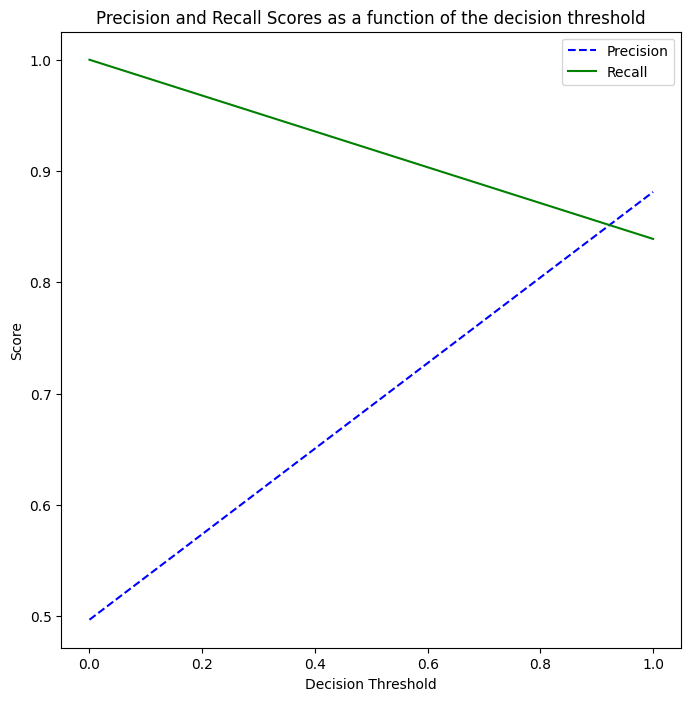

In [65]:
plot_precision_recall_vs_threshold(p, r, thresholds)

# Conclusión final

Comenzamos con la exploración y preprocesamiento de los datos, donde limpiamos y preparamos los datos para su análisis. Este paso fue crucial para garantizar que nuestros modelos de aprendizaje automático pudieran interpretar correctamente los datos.

Luego, aplicamos dos modelos diferentes: una regresión logística y un XGBoost. La regresión logística, aunque es un modelo más simple, nos proporcionó una buena base sobre la cual pudimos construir y comparar. Sin embargo, fue el modelo XGBoost el que demostró ser más óptimo según las métricas y resultados obtenidos.

El modelo XGBoost superó a la regresión logística en términos de rendimiento, lo que indica que este modelo es más adecuado para nuestro conjunto de datos y la tarea de análisis de sentimientos. Esto puede deberse a la capacidad del XGBoost para manejar características no lineales y su resistencia al sobreajuste.

Finalmente decir que creo que ha sido un ejercicio muy completo en el que he abordado todos los puntos necesario para un problema de NLP. Me hubiera gustado haber podido aplicar algún modelo de Deep Learning pero debido a problemas de salud he tenido muy poco tiempo durante la semana. Sin duda en cuento tenga más tiempo haré una exploración más exhaustiva y podré utilizar DL.